<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Introduction to Machine Learning <br>
<font color=696880 size=4>
<!-- <br> -->
CE 40477 - Fall 2024

____


<font color=green size=6>
Recap of linear regression

**Steps:**
  - simplifed explanation of linear regression
  - closed form solution -> implementing LR from scratch
  - polynomial regression -> implementation
  - we could be using interactive pyplots to show the effect of degree
  - visualizing $E_{rms}$ as plot
  - regularization (ridge and lasso) and comparing them -> also compare generalization

<font color=green size=6>
Recap of linear regression

 **Steps:**
  - simplifed explanation of GD and SGD
  - implement derivatives in code
  - first, come up with a convex $J(w)$ and plot each step of convergens
  - then, compe up with a more generalized cost function and choose random starting points to reach different minima -> 3D plotting could help massively

<font color=green size=6>
Further exercises

  **Suggestions:**
  - we could use basis functions other than polynomial -> simply define other basis functions and use scikit tools to define a solution with proper generalization in another feature space
  - this might be too soon for students to get used to -> should we even call it kernel ?
  - Arshia knows a good house prices dataset with multiple features. We could implement house price regression and plot them in Tehran map to make it more attractive !

## Generate Synthetic Data

In [161]:
import numpy as np
import matplotlib.pyplot as plt

In [162]:
def generate_data(n=50, noise=10.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 2.5x + 5
    true_slope = 2.5
    true_intercept = 5.0
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

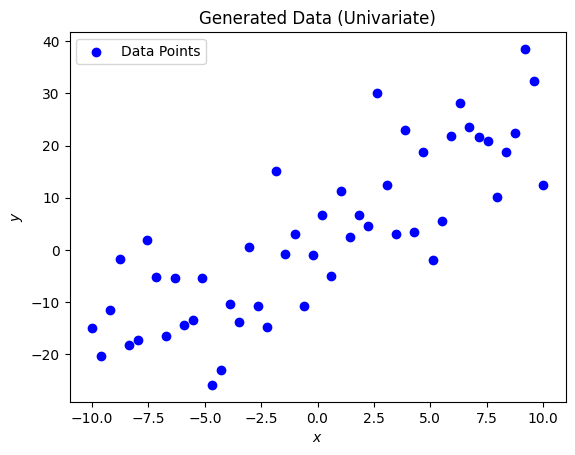

In [163]:
X, y = generate_data()
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

## Implement the Closed-Form Solution

In [164]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

# Linear Regression using closed-form solution
def linear_regression_closed_form(X, y):
    # Adding bias term (x_0 = 1) to input vector X
    X_b = np.c_[np.ones((len(X), 1)), X]  # X_b is now the full input vector with bias term
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return w

# Get parameter vector w
w = linear_regression_closed_form(X, y)
print(f"Parameters (w): ")
print(f"w_1 = {w[0]:.2f}, w_0 = {w[1]:.2f}")


Parameters (w): 
w_1 = 2.75, w_0 = 2.21


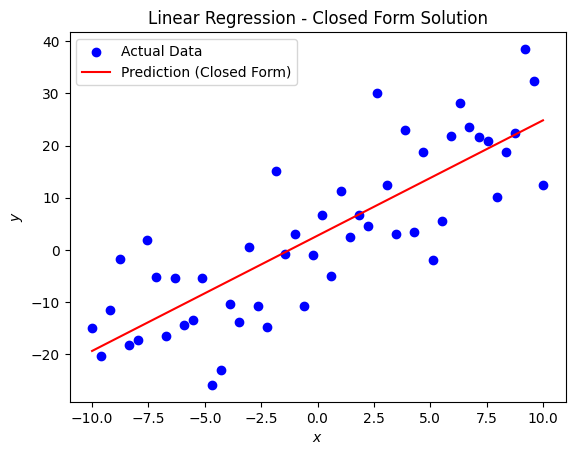

In [166]:
y_pred = h_w(X, w)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Prediction (Closed Form)')
plt.title("Linear Regression - Closed Form Solution")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

# Polynomial Regression
Linear regression can be extended to model nonlinear relationships by introducing polynomial terms.


## Create Polynomial Features

In [167]:
# Function to generate polynomial features (input matrix X')
def polynomial_features(X, degree):
    X_poly = np.c_[np.ones(len(X))]
    for i in range(1, degree + 1):
        X_poly = np.c_[X_poly, X**i]
    return X_poly

## Implement Polynomial Regression

In [168]:
def polynomial_regression(X, y, degree):
    X_poly = polynomial_features(X, degree)
    # Closed-form solution: w = (X'^T * X')^-1 * X'^T * y
    w = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return w

m = 5  # Degree of the polynomial regression
w_poly = polynomial_regression(X, y, m)  # Parameter vector w

print(f"Parameters (w) for Degree {m}: {w_poly}")


Parameters (w) for Degree 5: [ 7.62256225e-01  3.61915524e+00  6.56217891e-02 -4.30987468e-02
 -1.35616512e-04  2.76350988e-04]


## Visualize the Polynomial Fit

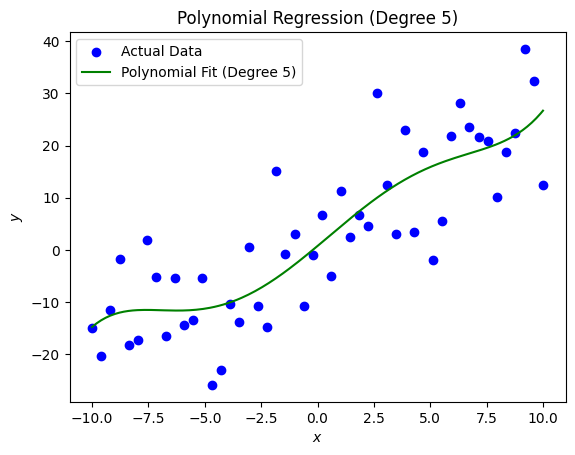

In [169]:
X_fit = np.linspace(X.min(), X.max(), 200)
X_fit_poly = polynomial_features(X_fit, m)
y_poly_pred = X_fit_poly.dot(w_poly)  # h_w(x) = X' * w

# Plot the actual data and the polynomial fit
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_fit, y_poly_pred, color='green', label=f'Polynomial Fit (Degree {m})')
plt.title(f"Polynomial Regression (Degree {m})")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()


# Visualizing 𝐸_𝑟𝑚𝑠 as a Plot
The Root Mean Square Error (RMSE) helps us understand how well our model fits the data.

## Compute RMSE

In [170]:
def compute_rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

## Plot RMSE vs Polynomial Degree

Degree 0: Train RMSE = 15.64, Test RMSE = 16.83


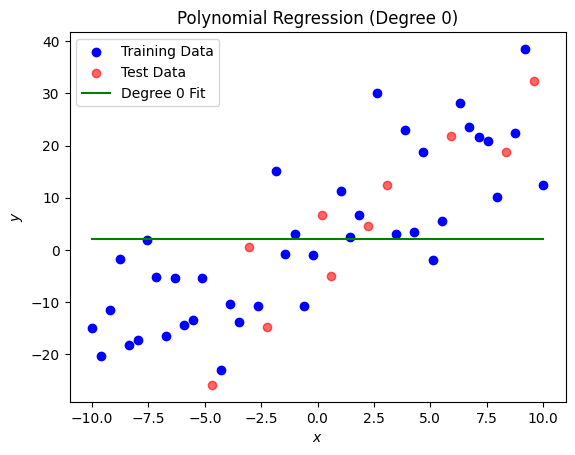

Degree 1: Train RMSE = 9.16, Test RMSE = 8.97


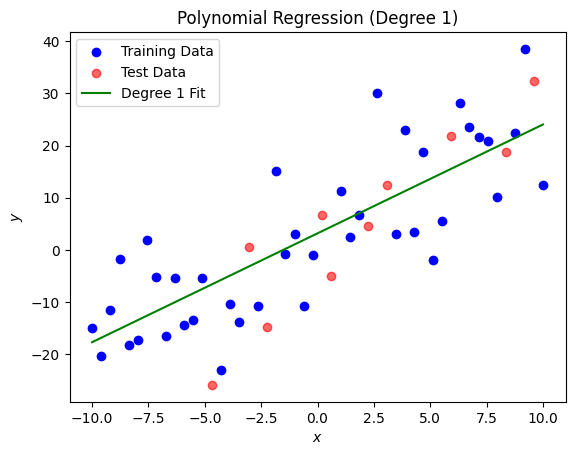

Degree 2: Train RMSE = 9.10, Test RMSE = 8.48


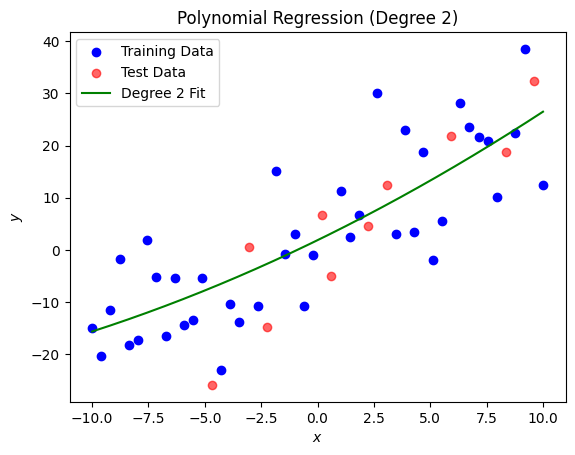

Degree 3: Train RMSE = 8.94, Test RMSE = 8.23


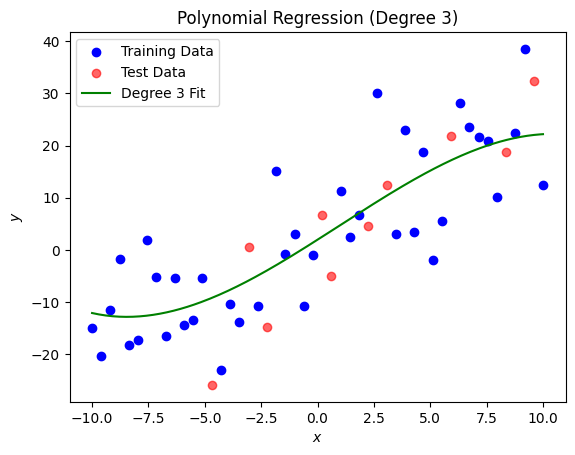

Degree 4: Train RMSE = 8.93, Test RMSE = 8.28


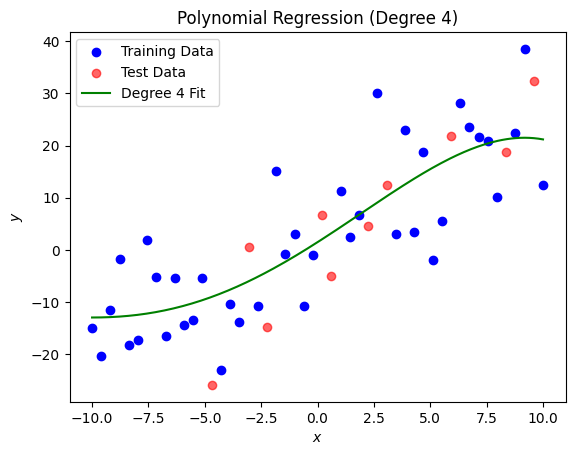

Degree 5: Train RMSE = 8.89, Test RMSE = 8.06


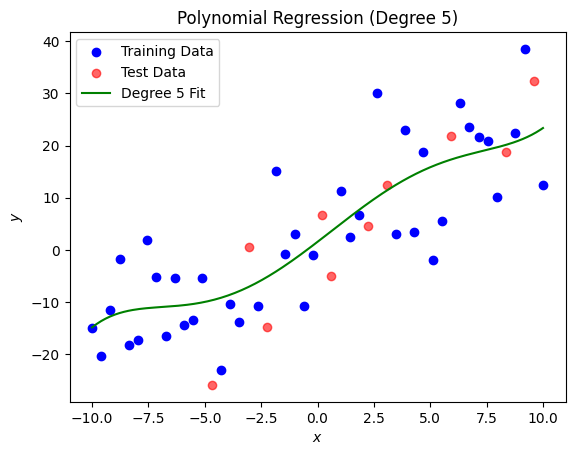

Degree 6: Train RMSE = 8.52, Test RMSE = 8.30


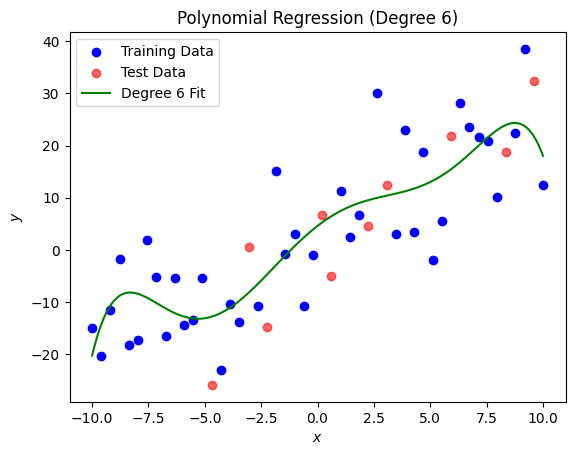

Degree 7: Train RMSE = 8.40, Test RMSE = 8.78


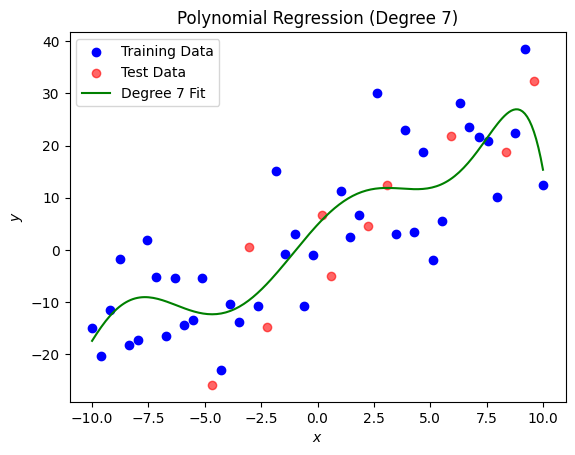

Degree 8: Train RMSE = 8.39, Test RMSE = 8.77


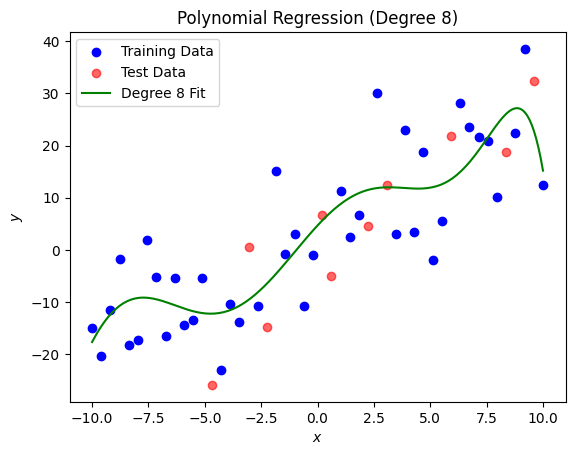

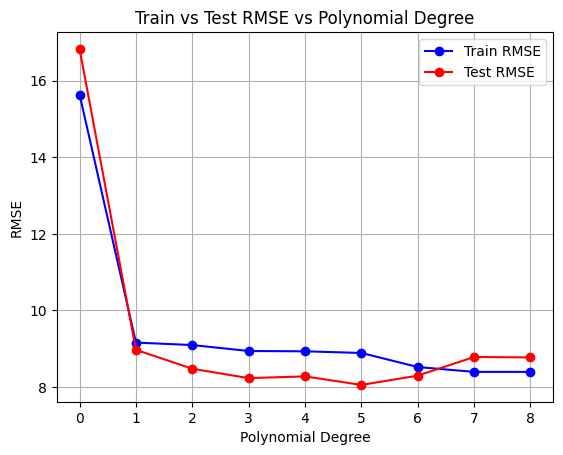

In [171]:
from sklearn.model_selection import train_test_split

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 9)
train_rms_errors = []
test_rms_errors = []


for d in degrees:
    # Train the model on the training set
    w_poly = polynomial_regression(X_train, y_train, d)

    # Compute predictions for the training set
    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = X_train_poly.dot(w_poly)

    # Compute predictions for the test set
    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = X_test_poly.dot(w_poly)

    # Calculate RMSE for both training and test sets
    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    # Store the errors
    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    # Print the RMSE for the current degree
    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

    # Plot the polynomial fit on the training data
    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(X.min(), X.max(), 200)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = X_fit_poly.dot(w_poly)
    plt.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()

# Plot RMSE for training and test sets
plt.plot(degrees, train_rms_errors, marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rms_errors, marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

# Regularization: Ridge and Lasso Regression

## Implementing Ridge and Lasso Regression
We'll use scikit-learn for these implementations.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.67321e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.747e+03, tolerance: 1.260e+00
  model = cd_fast.enet_coordinate_descent(


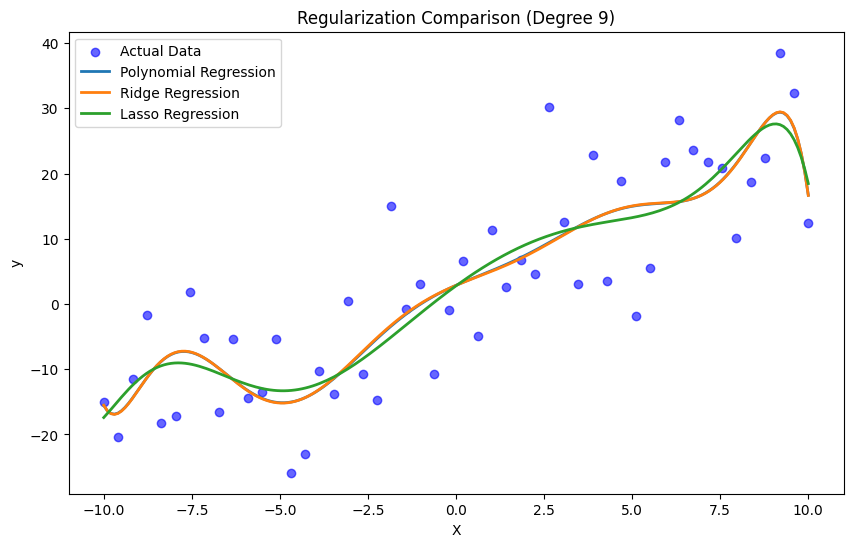

In [172]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

degree = 9
X_reshape = X.reshape(-1, 1)

model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_poly.fit(X_reshape, y)

model_ridge = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
model_ridge.fit(X_reshape, y)

model_lasso = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.1, max_iter=10000))
model_lasso.fit(X_reshape, y)

X_plot = np.linspace(X.min(), X.max(), 200)[:, np.newaxis]

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data', alpha=0.6)

plt.plot(X_plot, model_poly.predict(X_plot), label='Polynomial Regression', linewidth=2)
plt.plot(X_plot, model_ridge.predict(X_plot), label='Ridge Regression', linewidth=2)
plt.plot(X_plot, model_lasso.predict(X_plot), label='Lasso Regression', linewidth=2)

plt.title(f"Regularization Comparison (Degree {degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Gradient Descent Optimization
## Implementing Gradient Descent on a Convex Function
### Define a Convex Cost Function

In [173]:
def J_convex(w):
    return w[0]**2 + 2 * w[1]**2

def grad_J_convex(w):
    return np.array([2 * w[0], 4 * w[1]])

### Implement Gradient Descent

In [174]:
def gradient_descent(grad, w_init, learning_rate=0.1, n_steps=20):
    w = np.array(w_init)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

### Visualize the Gradient Descent Path

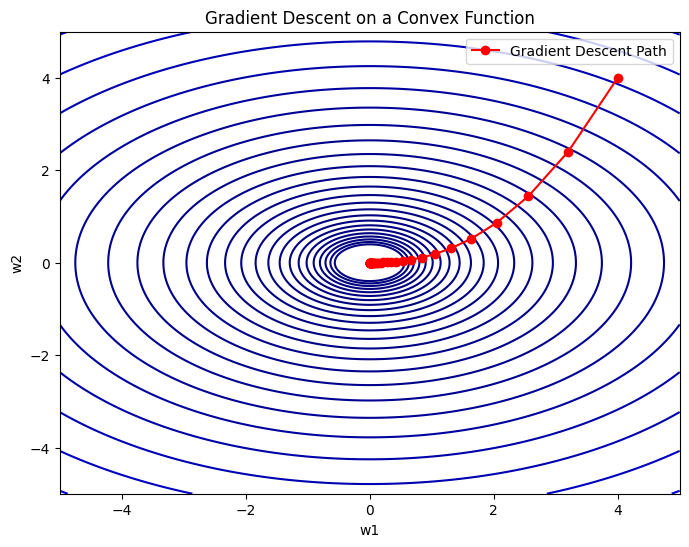

In [175]:
w_init = [4, 4]
path_convex = gradient_descent(grad_J_convex, w_init, learning_rate=0.1, n_steps=50)

w1_vals = np.linspace(-5, 5, 400)
w2_vals = np.linspace(-5, 5, 400)
W1, W2 = np.meshgrid(w1_vals, w2_vals)
J_vals = J_convex([W1, W2])

plt.figure(figsize=(8, 6))
contour_levels = np.logspace(-0.5, 3, 35)
plt.contour(W1, W2, J_vals, levels=contour_levels, cmap="jet")
path_x, path_y = path_convex[:, 0], path_convex[:, 1]
plt.plot(path_x, path_y, marker='o', color='red', label='Gradient Descent Path')
plt.title("Gradient Descent on a Convex Function")
plt.xlabel("w1")
plt.ylabel("w2")
plt.legend()
plt.show()

## Implementing Gradient Descent on a Non-Convex Function

### Implementing the Himmelblau's Function

In [176]:
def J_nonconvex(w):
    x, y = w
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def grad_J_nonconvex(w):
    x, y = w
    df_dx = 4 * x * (x**2 + y - 11) + 2 * (x + y**2 - 7)
    df_dy = 2 * (x**2 + y - 11) + 4 * y * (x + y**2 - 7)
    return np.array([df_dx, df_dy])

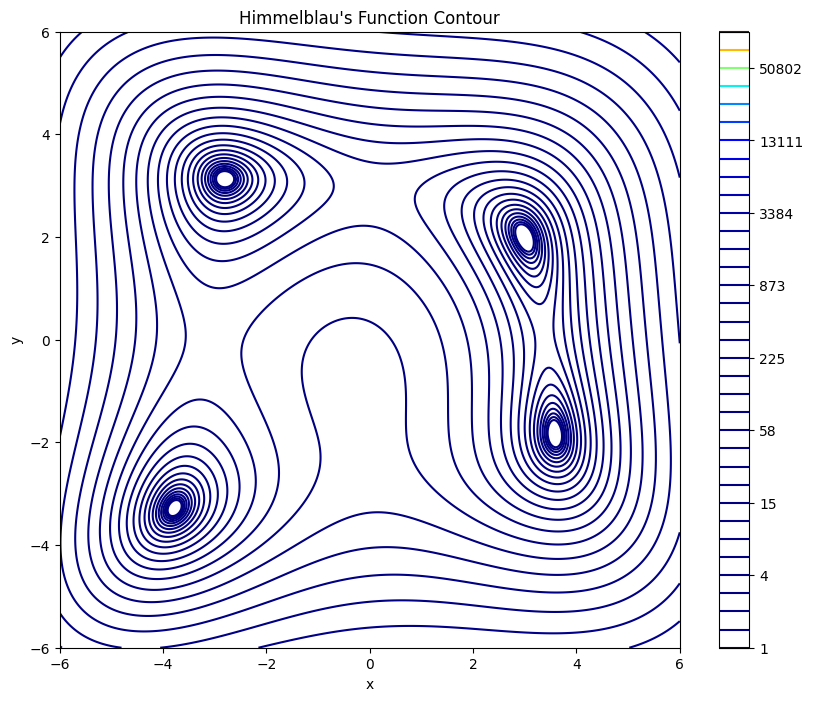

In [177]:
x_vals = np.linspace(-6, 6, 400)
y_vals = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = J_nonconvex([X, Y])

plt.figure(figsize=(10, 8))
contour_levels = np.logspace(0, 5, 35)
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
plt.title("Himmelblau's Function Contour")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

In [179]:
def gradient_descent(grad, w_init, learning_rate=0.01, n_steps=10000, tolerance=1e-6):
    w = np.array(w_init, dtype=float)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        grad_norm = np.linalg.norm(grad_w)
        if grad_norm < tolerance:
            print(f"Converged in {step} steps.")
            break
        w = w - learning_rate * grad_w
        path.append(w.copy())

    return np.array(path)

In [180]:
starting_points = [
    [0.0, 0.0],
    [-4.0, 4.0],
    [4.0, 4.0],
    [-5.0, -5.0]
]

paths = []
for idx, w_init in enumerate(starting_points):
    print(f"\nStarting Point {idx+1}: {w_init}")
    path = gradient_descent(grad_J_nonconvex, w_init, learning_rate=0.001, n_steps=10000)
    paths.append(path)


Starting Point 1: [0.0, 0.0]
Converged in 672 steps.

Starting Point 2: [-4.0, 4.0]
Converged in 264 steps.

Starting Point 3: [4.0, 4.0]
Converged in 634 steps.

Starting Point 4: [-5.0, -5.0]
Converged in 248 steps.


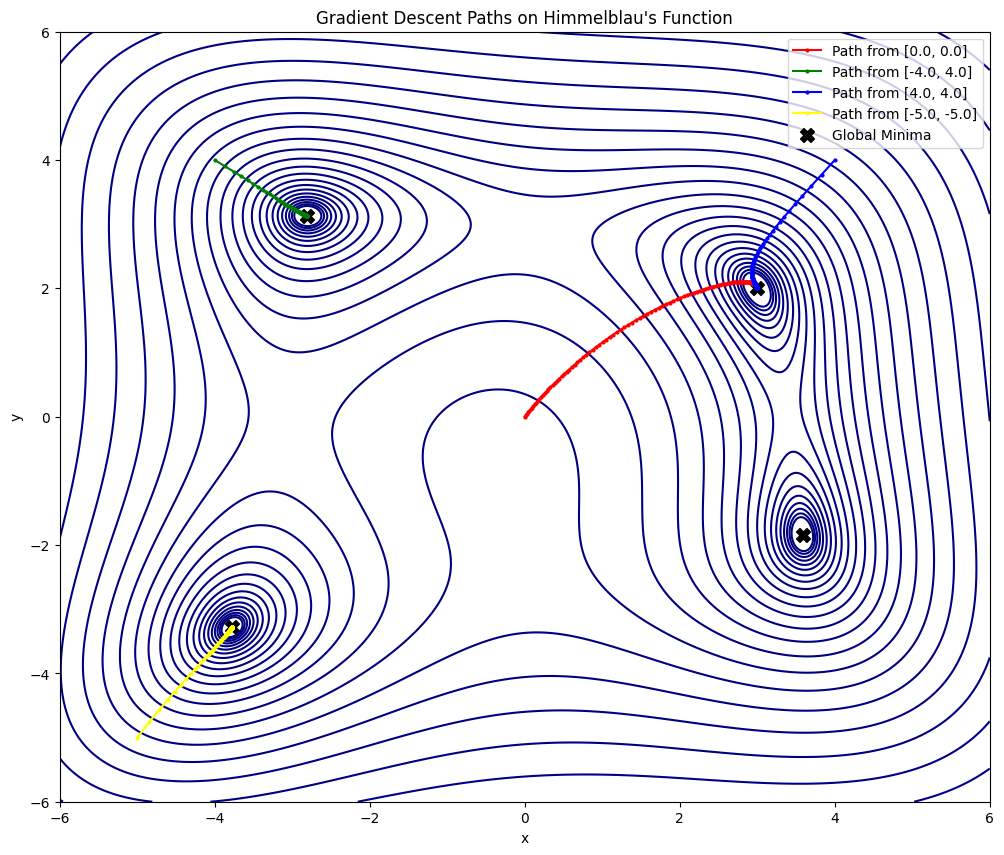

In [181]:
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
colors = ['red', 'green', 'blue', 'yellow']
labels = [f'Path from {p}' for p in starting_points]

for idx, path in enumerate(paths):
    path_x, path_y = path[:, 0], path[:, 1]
    plt.plot(path_x, path_y, marker='o', markersize=2, color=colors[idx], label=labels[idx])

minima = np.array([
    [3.0, 2.0],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
])
plt.scatter(minima[:, 0], minima[:, 1], color='black', s=100, marker='X', label='Global Minima')

plt.title("Gradient Descent Paths on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [182]:
learning_rates = [0.0001, 0.001, 0.01]
w_init = [0.5, -0.5]
paths_lr = []

for lr in learning_rates:
    print(f"\nLearning Rate: {lr}")
    path = gradient_descent(grad_J_nonconvex, w_init, learning_rate=lr, n_steps=10000)
    paths_lr.append((lr, path))


Learning Rate: 0.0001
Converged in 8713 steps.

Learning Rate: 0.001
Converged in 873 steps.

Learning Rate: 0.01
Converged in 100 steps.


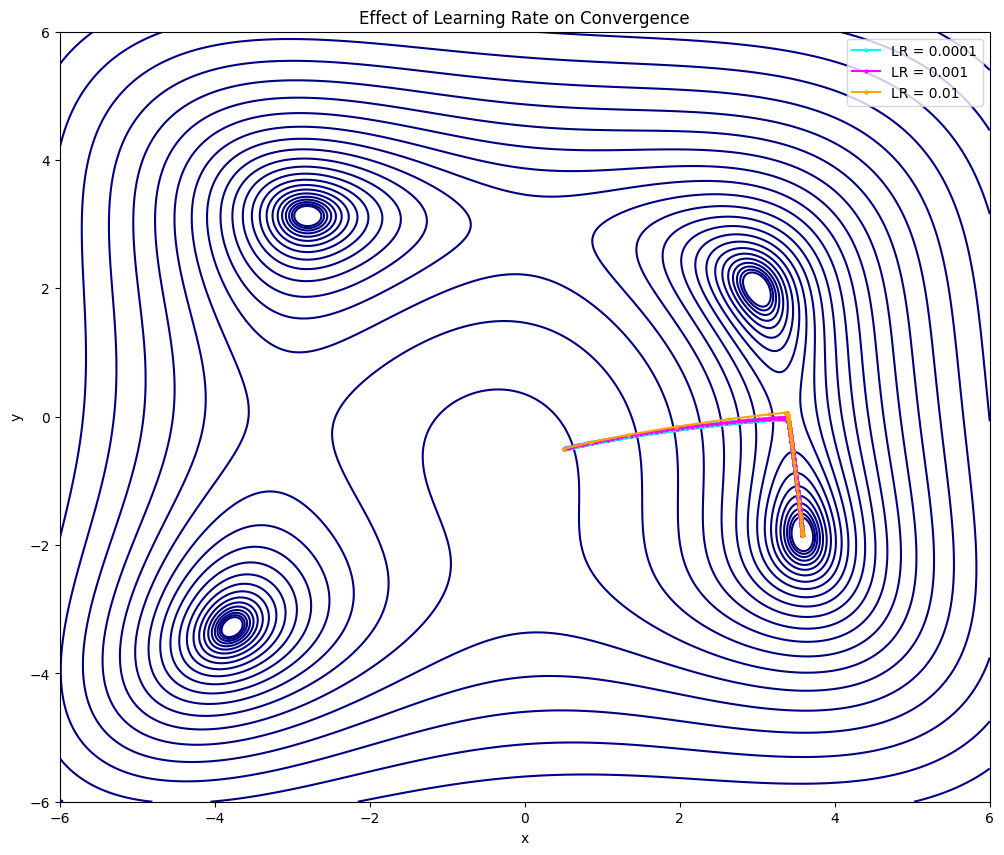

In [183]:
plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')
colors = ['cyan', 'magenta', 'orange']
labels = [f'LR = {lr}' for lr, _ in paths_lr]

for idx, (lr, path) in enumerate(paths_lr):
    path_x, path_y = path[:, 0], path[:, 1]
    plt.plot(path_x, path_y, marker='o', markersize=2, color=colors[idx], label=labels[idx])

plt.title("Effect of Learning Rate on Convergence")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [184]:
def gradient_descent_momentum(grad, w_init, learning_rate=0.01, n_steps=10000, momentum=0.9, tolerance=1e-6):
    w = np.array(w_init, dtype=float)
    v = np.zeros_like(w)
    path = [w.copy()]

    for step in range(n_steps):
        grad_w = grad(w)
        grad_norm = np.linalg.norm(grad_w)
        if grad_norm < tolerance:
            print(f"Converged in {step} steps.")
            break
        v = momentum * v - learning_rate * grad_w
        w = w + v
        path.append(w.copy())

    return np.array(path)

Converged in 348 steps.


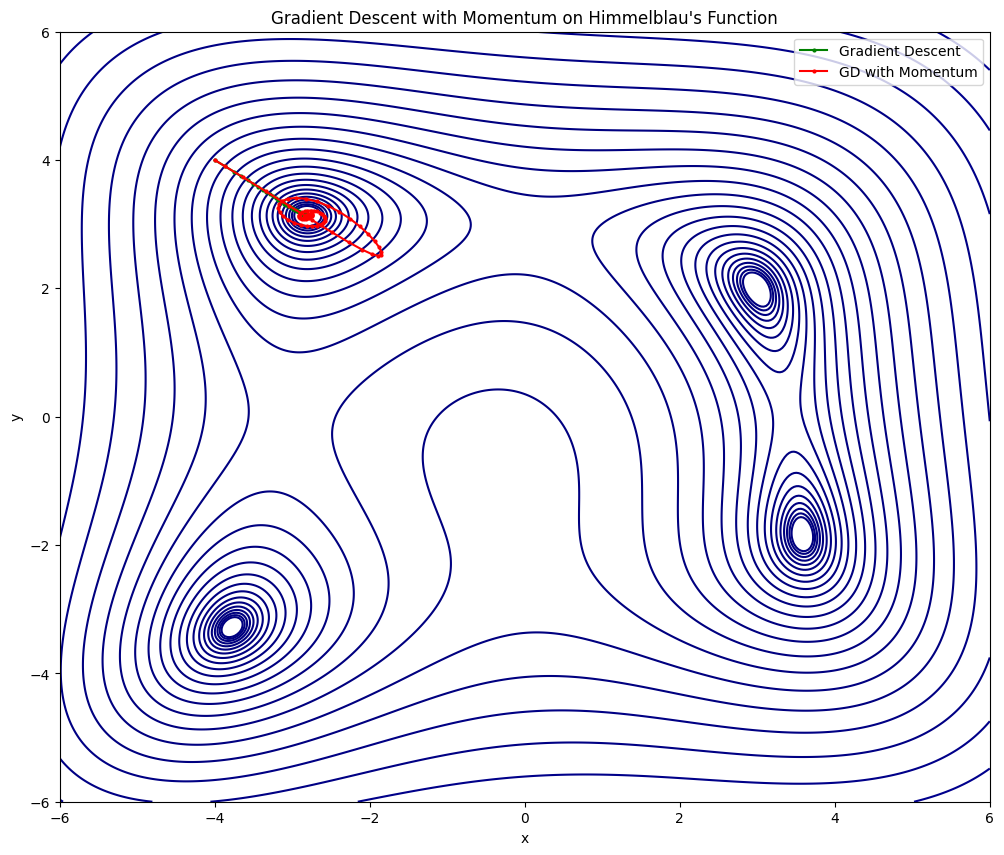

In [185]:
w_init = [-4.0, 4.0]
path_momentum = gradient_descent_momentum(grad_J_nonconvex, w_init, learning_rate=0.001, n_steps=10000)

plt.figure(figsize=(12, 10))
plt.contour(X, Y, Z, levels=contour_levels, cmap='jet')

path_x, path_y = paths[1][:, 0], paths[1][:, 1]
plt.plot(path_x, path_y, marker='o', markersize=2, color='green', label='Gradient Descent')

path_m_x, path_m_y = path_momentum[:, 0], path_momentum[:, 1]
plt.plot(path_m_x, path_m_y, marker='o', markersize=2, color='red', label='GD with Momentum')

plt.title("Gradient Descent with Momentum on Himmelblau's Function")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Real-World Example1: California House Price Prediction

## Dataset
We'll use the California Housing Dataset available in scikit-learn.

In [186]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

feature_names = housing.feature_names
print("Feature names:", feature_names)

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Data Preprocessing

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Implement Linear Regression

In [188]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.2f}")

Test RMSE: 0.75


## Feature Importance

In [189]:
coefficients = model.coef_
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.3f}")

MedInc: 0.854
HouseAge: 0.123
AveRooms: -0.294
AveBedrms: 0.339
Population: -0.002
AveOccup: -0.041
Latitude: -0.897
Longitude: -0.870


## Visualize Actual vs Predicted Prices

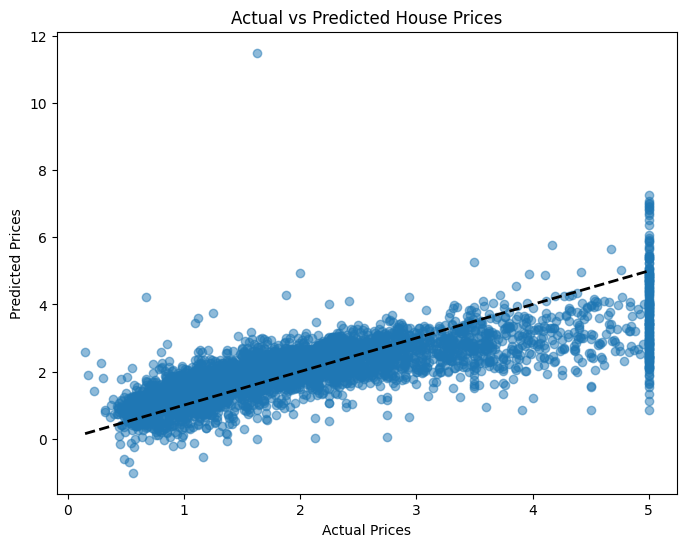

In [190]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

# Real-World Example2: Tehran House Price Prediction

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = '/content/housePrice.xlsx'
df = pd.read_excel(file_path)

df.head()

Area  Room  Parking  Warehouse  Elevator         Address       Price  \
0    63     1     True       True      True         Shahran  1850000000   
1    60     1     True       True      True         Shahran  1850000000   
2    79     2     True       True      True          Pardis   550000000   
3    95     2     True       True      True   Shahrake Qods   902500000   
4   123     2     True       True      True  Shahrake Gharb  7000000000   

    PriceUSD  
0   61666.67  
1   61666.67  
2   18333.33  
3   30083.33  
4  233333.33

In [ ]:
print(df['Area'].describe())
print(df[df['Area'] > 1e6])

count    3.479000e+03
mean     8.744000e+06
std      3.167266e+08
min      3.000000e+01
25%      6.900000e+01
50%      9.000000e+01
75%      1.200000e+02
max      1.616000e+10
Name: Area, dtype: float64
             Area  Room  Parking  Warehouse  Elevator            Address  \
570    3310000000     2     True       True      True        Ostad Moein   
709   16160000000     3     True       True      True           Pasdaran   
1604   8400000000     2     True       True      True         Gheitarieh   
2802   2550000000     2     True       True      True  Central Janatabad   

            Price   PriceUSD  
570    3310000000  110333.33  
709   16160000000  538666.67  
1604   8700000000  290000.00  
2802   2550000000   85000.00  


In [ ]:
Q1_area = df['Area'].quantile(0.25)
Q3_area = df['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

Q1_price = df['PriceUSD'].quantile(0.25)
Q3_price = df['PriceUSD'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

outliers_area = df[(df['Area'] < lower_bound_area) | (df['Area'] > upper_bound_area)]
outliers_price = df[(df['PriceUSD'] < lower_bound_price) | (df['PriceUSD'] > upper_bound_price)]

print(f'Outliers in Area:\n{outliers_area}')
print(f'Outliers in PriceUSD:\n{outliers_price}')

Outliers in Area:
      Area  Room  Parking  Warehouse  Elevator         Address        Price  \
59     215     3     True       True      True        Pakdasht   1750000000   
84     300     3     True       True     False       Baghestan   1500000000   
160    245     3     True       True      True       Farmanieh  26950000000   
167    200     3     True       True      True        Pasdaran  12000000000   
174    236     4     True       True      True      Gheitarieh  20000000000   
...    ...   ...      ...        ...       ...             ...          ...   
3264   205     3     True       True      True       Farmanieh  20000000000   
3267   220     4     True       True     False      Azarbaijan  15000000000   
3334   285     4     True       True      True  Shahrake Gharb  28500000000   
3366   197     3     True       True      True       Marzdaran  15563000000   
3388   200     2    False      False     False          Rudhen   2850000000   

       PriceUSD   LogArea  LogPri

In [ ]:
df_cleaned = df[(df['Area'] >= lower_bound_area) & (df['Area'] <= upper_bound_area) &
                (df['PriceUSD'] >= lower_bound_price) & (df['PriceUSD'] <= upper_bound_price)]

print(df_cleaned.describe())

              Area         Room         Price       PriceUSD      LogArea  \
count  3112.000000  3112.000000  3.112000e+03    3112.000000  3112.000000   
mean     90.353470     1.948265  3.393833e+09  113127.752988     4.458586   
std      30.790158     0.638090  2.844133e+09   94804.436318     0.337313   
min      30.000000     0.000000  3.600000e+06     120.000000     3.433987   
25%      66.000000     2.000000  1.250000e+09   41666.670000     4.204693   
50%      86.000000     2.000000  2.450000e+09   81666.670000     4.465908   
75%     109.000000     2.000000  4.500000e+09  150000.000000     4.700480   
max     192.000000     5.000000  1.282500e+10  427500.000000     5.262690   

       LogPriceUSD  
count  3112.000000  
mean     11.264833  
std       0.923601  
min       4.795791  
25%      10.637481  
50%      11.310413  
75%      11.918397  
max      12.965712  


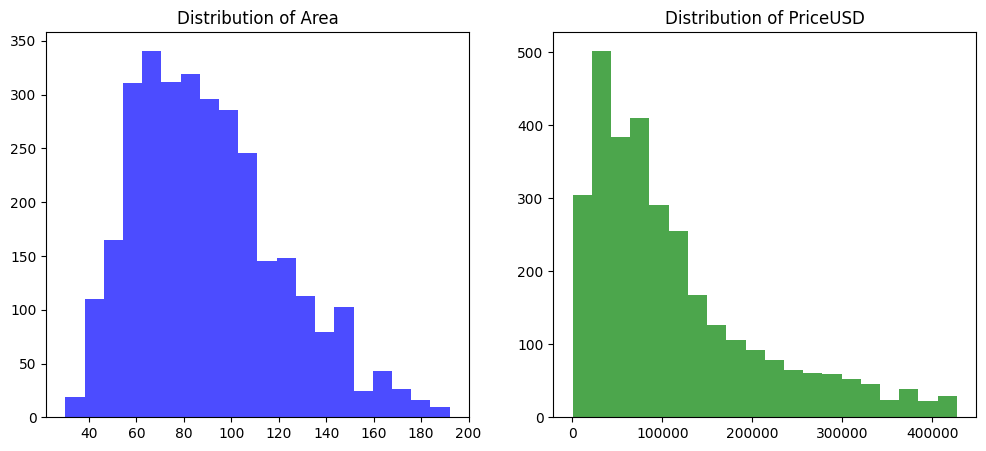

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned['Area'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Area')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['PriceUSD'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of PriceUSD')

plt.show()

In [ ]:
X = df_cleaned[['Area']]
y = df_cleaned['PriceUSD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4641731553.653556
R-squared: 0.48044569918077407


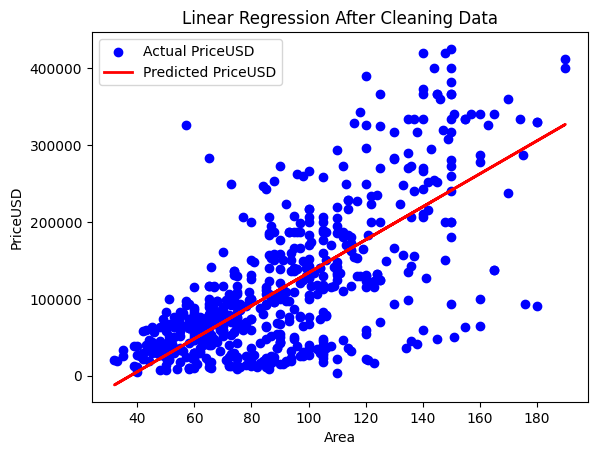

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual PriceUSD')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted PriceUSD')
plt.xlabel('Area')
plt.ylabel('PriceUSD')
plt.title('Linear Regression After Cleaning Data')
plt.legend()
plt.show()

In [ ]:
def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree=degree)
    return poly.fit_transform(X)

def polynomial_regression(X, y, degree):
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    return model

def compute_rms_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

Degree 0: Train RMSE = 94856.39, Test RMSE = 94520.33


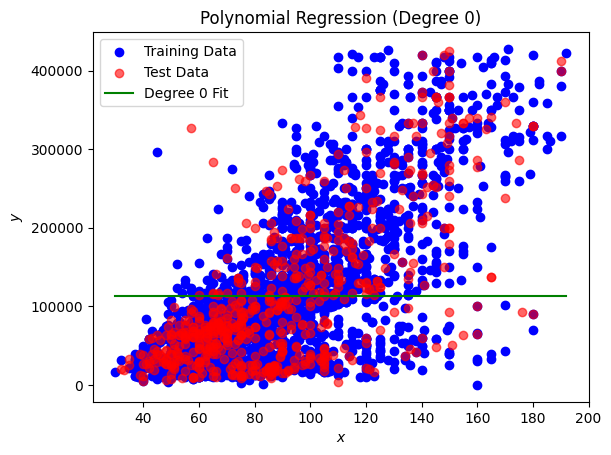

Degree 1: Train RMSE = 68724.30, Test RMSE = 68130.25


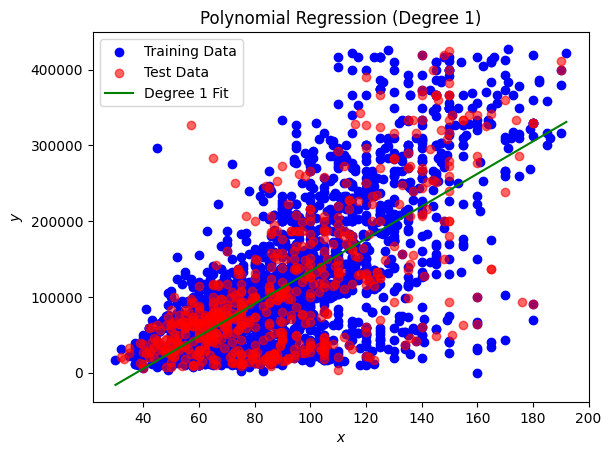

Degree 2: Train RMSE = 68050.90, Test RMSE = 67453.26


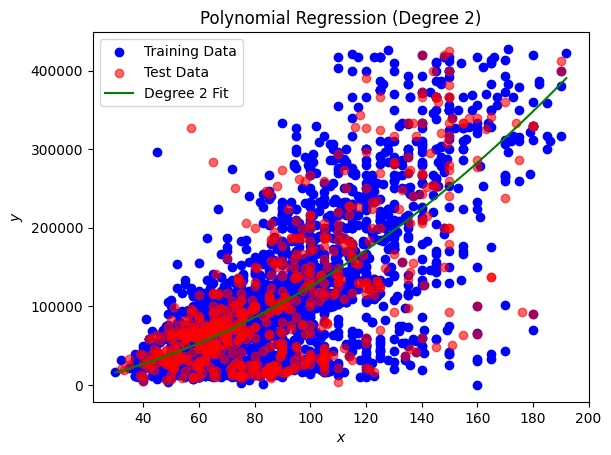

Degree 3: Train RMSE = 67820.66, Test RMSE = 67119.81


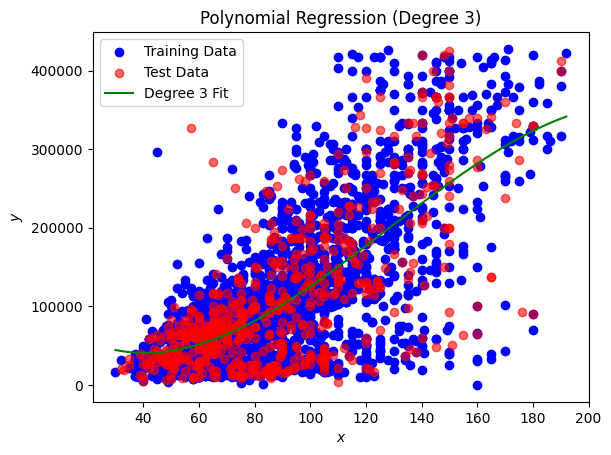

Degree 4: Train RMSE = 67799.27, Test RMSE = 67018.33


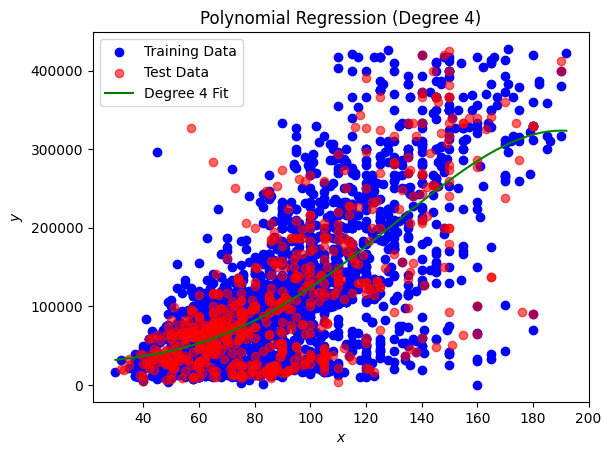

Degree 5: Train RMSE = 67701.66, Test RMSE = 66766.53


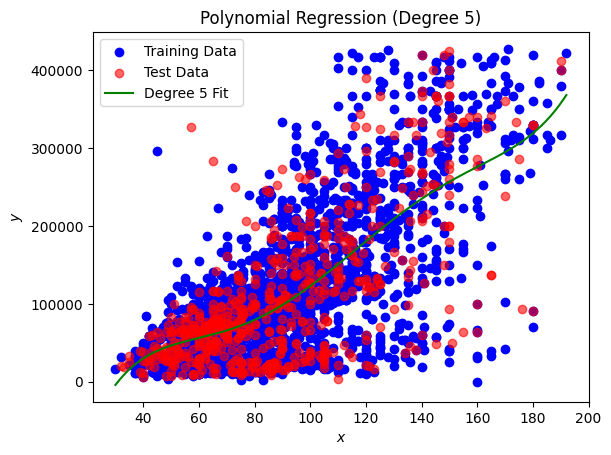

Degree 6: Train RMSE = 67700.94, Test RMSE = 66732.16


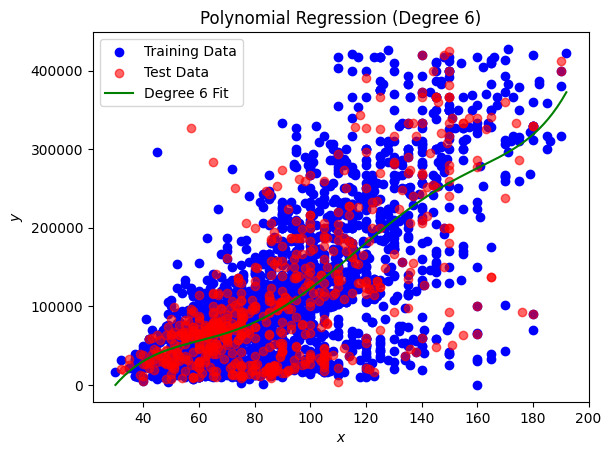

Degree 7: Train RMSE = 67702.59, Test RMSE = 66736.10


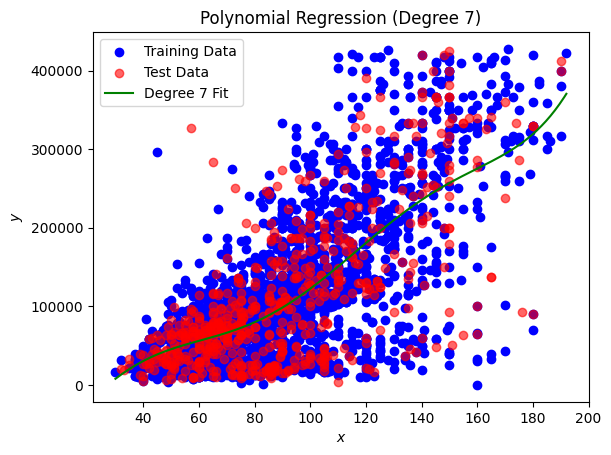

Degree 8: Train RMSE = 67713.76, Test RMSE = 66719.55


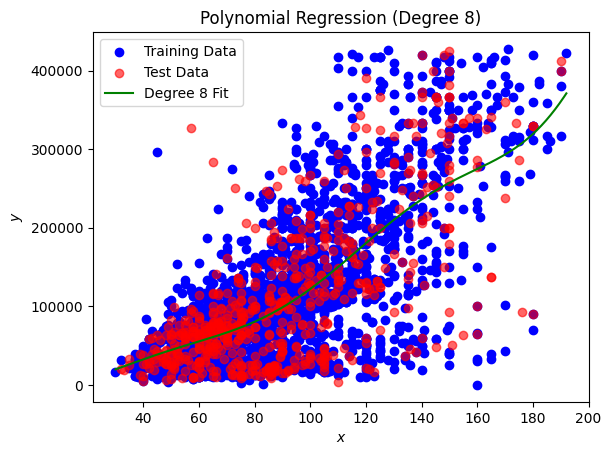

Degree 9: Train RMSE = 67729.80, Test RMSE = 66704.26


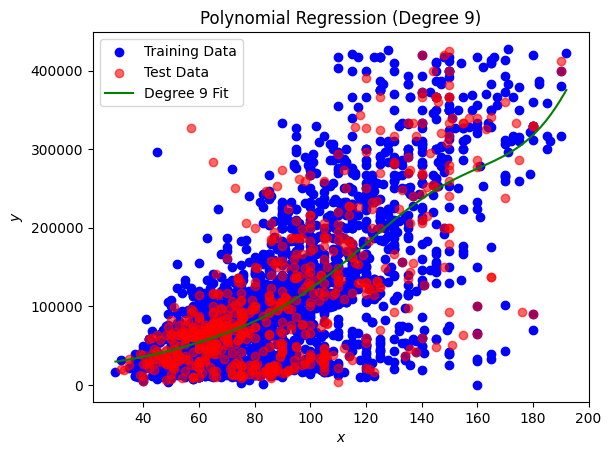

Degree 10: Train RMSE = 67742.55, Test RMSE = 66711.47


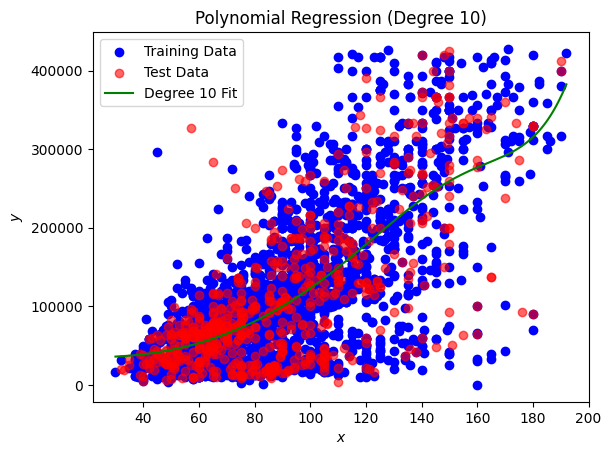

Degree 11: Train RMSE = 67751.94, Test RMSE = 66739.41


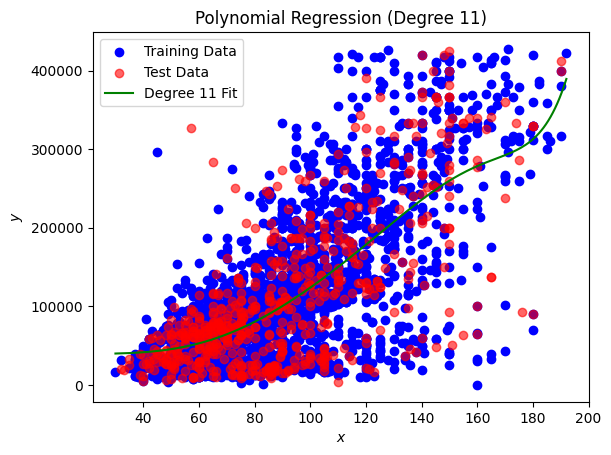

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = range(0, 12)
train_rms_errors = []
test_rms_errors = []

for d in degrees:
    model = polynomial_regression(X_train, y_train, d)

    X_train_poly = polynomial_features(X_train, d)
    y_train_pred = model.predict(X_train_poly)

    X_test_poly = polynomial_features(X_test, d)
    y_test_pred = model.predict(X_test_poly)

    train_rms_error = compute_rms_error(y_train, y_train_pred)
    test_rms_error = compute_rms_error(y_test, y_test_pred)

    train_rms_errors.append(train_rms_error)
    test_rms_errors.append(test_rms_error)

    print(f"Degree {d}: Train RMSE = {train_rms_error:.2f}, Test RMSE = {test_rms_error:.2f}")

    plt.scatter(X_train, y_train, color='blue', label="Training Data")
    plt.scatter(X_test, y_test, color='red', label="Test Data", alpha=0.6)
    X_fit = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    X_fit_poly = polynomial_features(X_fit, d)
    y_fit_pred = model.predict(X_fit_poly)
    plt.plot(X_fit, y_fit_pred, label=f"Degree {d} Fit", color='green')
    plt.title(f"Polynomial Regression (Degree {d})")
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()